In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv(r'C:\Users\ASUS\OneDrive\Documents\python\property pro\final data')

## Inspecting the Data
First, we’ll inspect the data to ensure it's clean and ready for analysis. This will help check for missing values, data types, and if any cleaning is necessary.

In [8]:
df.columns

Index(['lga', 'Population_2024', '_2024_Density_per_sq_km',
       'Number_of_Registered_Businesses_2024', 'Unemployment_Rate_2024',
       'avg_rent_2024', 'Apartment_Rooms', 'Population_2023',
       '_2023_Density_per_sq_km', 'Number_of_Registered_Businesses_2023',
       'Unemployment_Rate_2023', 'avg_rent_2023'],
      dtype='object')

In [10]:
# Inspect the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   lga                                   48 non-null     object 
 1   Population_2024                       48 non-null     int64  
 2   _2024_Density_per_sq_km               48 non-null     int64  
 3   Number_of_Registered_Businesses_2024  48 non-null     int64  
 4   Unemployment_Rate_2024                48 non-null     float64
 5   avg_rent_2024                         48 non-null     int64  
 6   Apartment_Rooms                       48 non-null     int64  
 7   Population_2023                       48 non-null     int64  
 8   _2023_Density_per_sq_km               48 non-null     int64  
 9   Number_of_Registered_Businesses_2023  48 non-null     int64  
 10  Unemployment_Rate_2023                48 non-null     float64
 11  avg_rent_2023        

In [11]:
# Convert rent prices to millions for easier readability
df['avg_rent_2023'] = df['avg_rent_2023'] / 1e6
df['avg_rent_2024'] = df['avg_rent_2024'] / 1e6

# Display the dataset with updated rent prices
print(df[['lga', 'avg_rent_2023', 'avg_rent_2024']].head())


       lga  avg_rent_2023  avg_rent_2024
0  Eti-Osa           1.16       3.270833
1  Eti-Osa           1.16       5.490983
2  Eti-Osa           4.70       3.270833
3  Eti-Osa           3.10       5.490983
4  Eti-Osa           3.10       3.270833


## Distribution of Rent Prices Across LGAs
Let’s visualize how rent prices are distributed across different LGAs for 2023 and 2024 using bar charts.

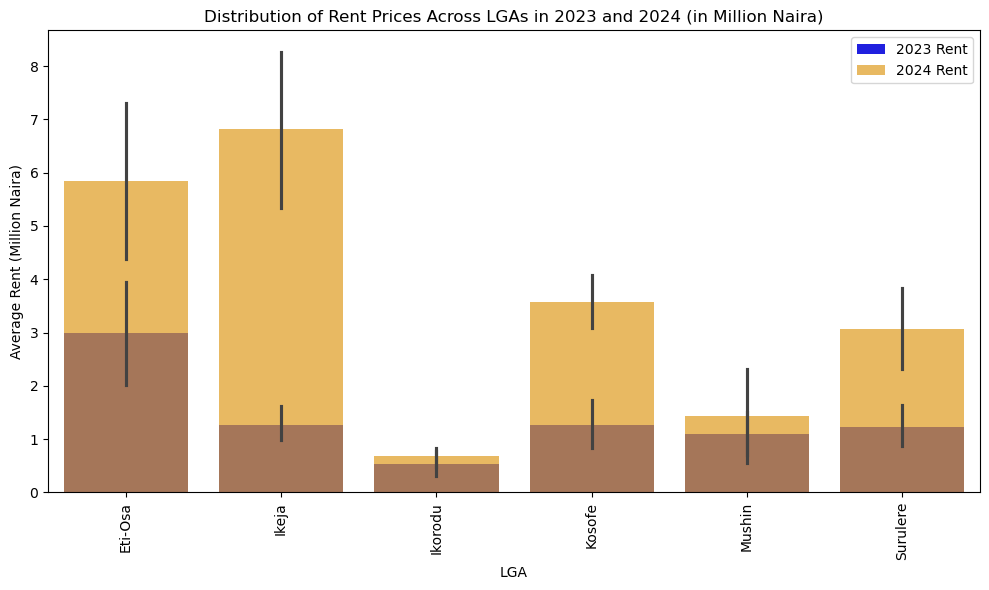

In [12]:
# Plotting rent distribution for 2023 and 2024
plt.figure(figsize=(10, 6))
sns.barplot(x='lga', y='avg_rent_2023', data=df, color='blue', label='2023 Rent')
sns.barplot(x='lga', y='avg_rent_2024', data=df, color='orange', label='2024 Rent', alpha=0.7)

plt.xticks(rotation=90)
plt.title('Distribution of Rent Prices Across LGAs in 2023 and 2024 (in Million Naira)')
plt.xlabel('LGA')
plt.ylabel('Average Rent (Million Naira)')
plt.legend()
plt.tight_layout()
plt.show()


#Explanation:
#The bar chart compares the average rent across different LGAs for 2023 and 2024. 
#The height of the bars shows how rent prices vary between LGAs and over time.

## Correlation Analysis
Now, let's check if there is a correlation between rent prices in 2023 and 2024, and other factors like population, density, and the number of businesses.

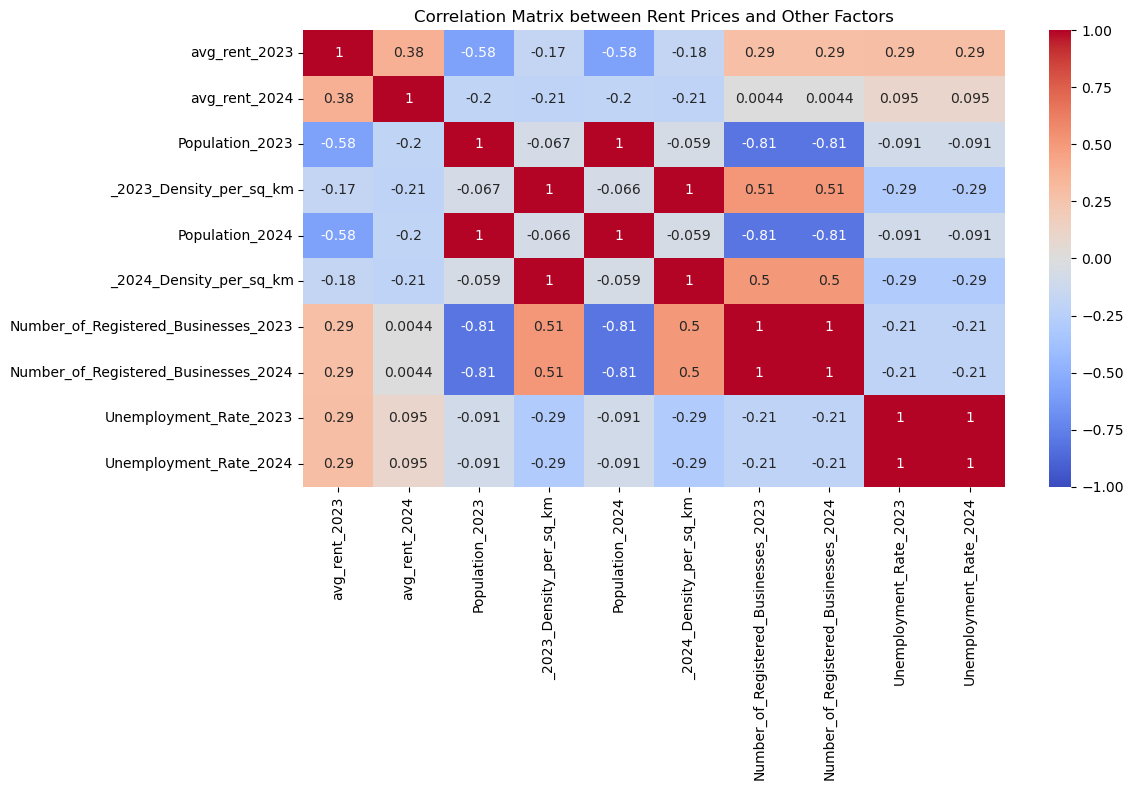

In [13]:
# Select relevant columns for correlation analysis
correlation_columns = ['avg_rent_2023', 'avg_rent_2024', 'Population_2023', '_2023_Density_per_sq_km', 
                       'Population_2024', '_2024_Density_per_sq_km', 'Number_of_Registered_Businesses_2023', 
                       'Number_of_Registered_Businesses_2024', 'Unemployment_Rate_2023', 'Unemployment_Rate_2024']

# Calculate the correlation matrix
corr_matrix = df[correlation_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix between Rent Prices and Other Factors')
plt.tight_layout()
plt.show()


#Explanation:
#This heatmap shows the correlation between rent prices, population, density, unemployment rates, and the number of businesses for both 2023 and 2024.
#A correlation coefficient near 1 means a strong positive relationship, and near -1 indicates a negative relationship. Values near 0 suggest no significant relationship.

## Comparing Rent Prices Over Time
We can visualize how rent prices have changed between 2023 and 2024 across LGAs.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2240\714000102.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lga', y='rent_change_%', data=df, palette='coolwarm')


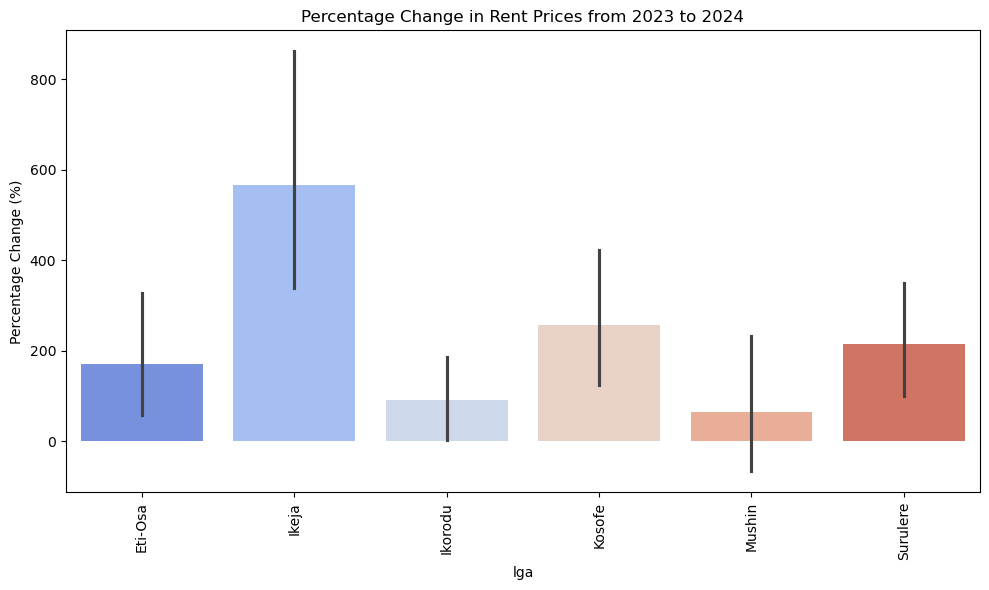

In [14]:
# Calculate the percentage change in rent prices between 2023 and 2024
df['rent_change_%'] = ((df['avg_rent_2024'] - df['avg_rent_2023']) / df['avg_rent_2023']) * 100

# Plot the percentage change
plt.figure(figsize=(10, 6))
sns.barplot(x='lga', y='rent_change_%', data=df, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Percentage Change in Rent Prices from 2023 to 2024')
plt.ylabel('Percentage Change (%)')
plt.tight_layout()
plt.show()

#Explanation:
#This bar chart shows the percentage change in rent prices for each LGA from 2023 to 2024. 
# A positive percentage means rent has increased, while a negative percentage means rent has decreased.

## Checking for Factors Influencing Rent
To understand if other factors (like population, density, and businesses) affect rent prices, we can run a basic regression analysis.

In [15]:
import statsmodels.api as sm

# Select independent variables and dependent variable (avg_rent_2024)
X = df[['Population_2024', '_2024_Density_per_sq_km', 'Number_of_Registered_Businesses_2024', 'Unemployment_Rate_2024']]
y = df['avg_rent_2024']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          avg_rent_2024   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     1.393
Date:                Mon, 07 Oct 2024   Prob (F-statistic):              0.252
Time:                        09:55:51   Log-Likelihood:                -113.74
No. Observations:                  48   AIC:                             237.5
Df Residuals:                      43   BIC:                             246.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


## Analyze Rent Prices by Apartment Type
We can group the rent prices by apartment type (1-bedroom, 2-bedroom, 3-bedroom) to compare how prices vary for different apartment sizes across the LGAs.

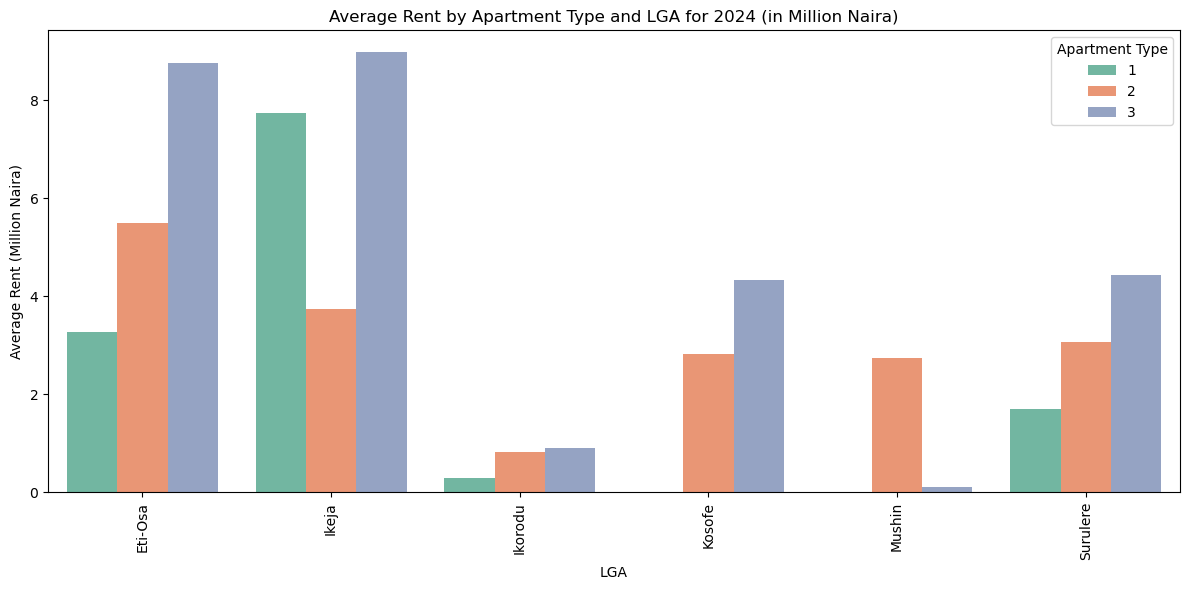

In [16]:
# Grouping the data by LGA and Apartment Type
rent_by_apartment_type = df.groupby(['lga', 'Apartment_Rooms'])[['avg_rent_2023', 'avg_rent_2024']].mean().reset_index()

# Plotting rent distribution by Apartment Type for 2024
plt.figure(figsize=(12, 6))
sns.barplot(x='lga', y='avg_rent_2024', hue='Apartment_Rooms', data=rent_by_apartment_type, palette='Set2')

plt.xticks(rotation=90)
plt.title('Average Rent by Apartment Type and LGA for 2024 (in Million Naira)')
plt.xlabel('LGA')
plt.ylabel('Average Rent (Million Naira)')
plt.legend(title='Apartment Type', loc='upper right')
plt.tight_layout()
plt.show()

#   Explanation:
#   This bar chart will show how rent prices differ for 1-bedroom, 2-bedroom, and 3-bedroom apartments across different LGAs for 2024.
#   You can easily compare which LGAs have more expensive rent for larger apartments.

## Analyzing Correlations by Apartment Type
You can also check if there's a correlation between apartment type and rent prices, population, or other variables.

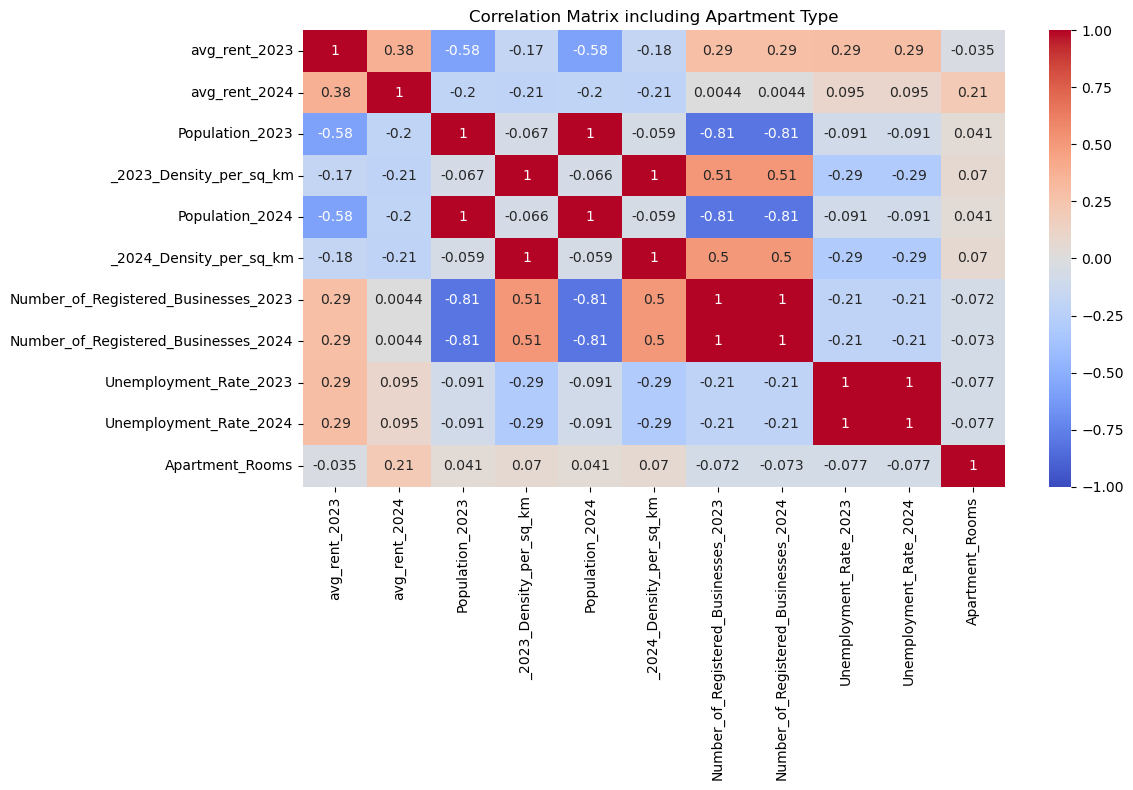

In [17]:
# Add Apartment Type into the correlation analysis
correlation_columns = ['avg_rent_2023', 'avg_rent_2024', 'Population_2023', '_2023_Density_per_sq_km', 
                       'Population_2024', '_2024_Density_per_sq_km', 'Number_of_Registered_Businesses_2023', 
                       'Number_of_Registered_Businesses_2024', 'Unemployment_Rate_2023', 'Unemployment_Rate_2024', 'Apartment_Rooms']

# Correlation matrix with Apartment Type included
corr_matrix = df[correlation_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix including Apartment Type')
plt.tight_layout()
plt.show()

#Explanation:
# This correlation heatmap will show how Apartment Type (number of rooms) correlates with other variables like rent prices, population, and density.
# A positive correlation with rent means that larger apartments tend to have higher rent prices.


## Regression Analysis Including Apartment Type
If you want to assess how apartment size affects rent along with other variables, you can include Apartment_Rooms in a regression analysis.

In [18]:
# Regression analysis including Apartment Type
X = df[['Population_2024', '_2024_Density_per_sq_km', 'Number_of_Registered_Businesses_2024', 'Unemployment_Rate_2024', 'Apartment_Rooms']]
y = df['avg_rent_2024']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


#Explanation:
# This will show if the number of rooms (apartment type) significantly affects rent prices, along with population, density, and the number of businesses in the LGA.
# Look at the p-values and coefficients to see if Apartment_Rooms has a statistically significant impact on rent.

                            OLS Regression Results                            
Dep. Variable:          avg_rent_2024   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     1.542
Date:                Mon, 07 Oct 2024   Prob (F-statistic):              0.197
Time:                        10:08:57   Log-Likelihood:                -112.62
No. Observations:                  48   AIC:                             237.2
Df Residuals:                      42   BIC:                             248.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


## Visualizing Rent Distribution by Apartment Size
Lastly, you can create a distribution plot to visualize how rent prices are spread across different apartment sizes.

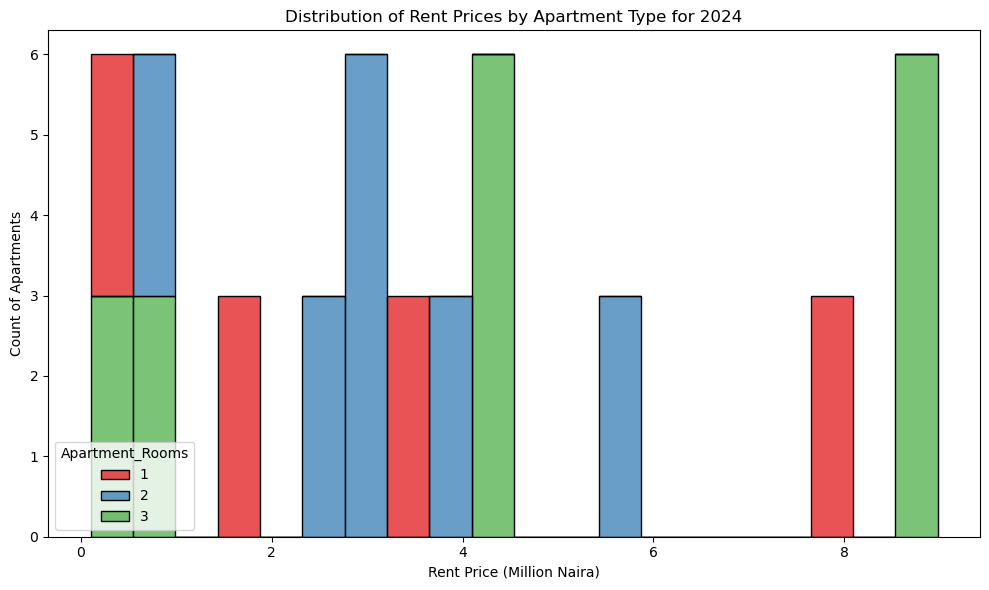

In [19]:
# Visualizing rent distribution by apartment type
plt.figure(figsize=(10, 6))
sns.histplot(df, x='avg_rent_2024', hue='Apartment_Rooms', multiple='stack', palette='Set1', bins=20)

plt.title('Distribution of Rent Prices by Apartment Type for 2024')
plt.xlabel('Rent Price (Million Naira)')
plt.ylabel('Count of Apartments')
plt.tight_layout()
plt.show()


# Explanation:
# This histogram will display how rent prices vary across different apartment types.
#  It helps understand if certain apartment sizes have a broader or narrower range of rent prices.